In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [22]:
img = cv2.imread('image_06734.jpg',1)

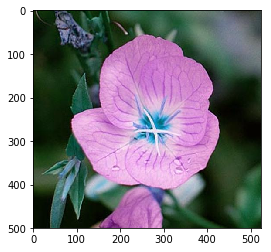

In [23]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RGB 0,53,22  , HSI 144.40058143648292,1.0,0.0980392156862745


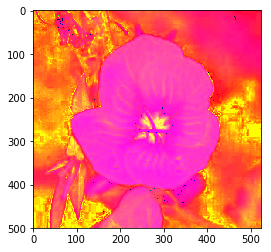

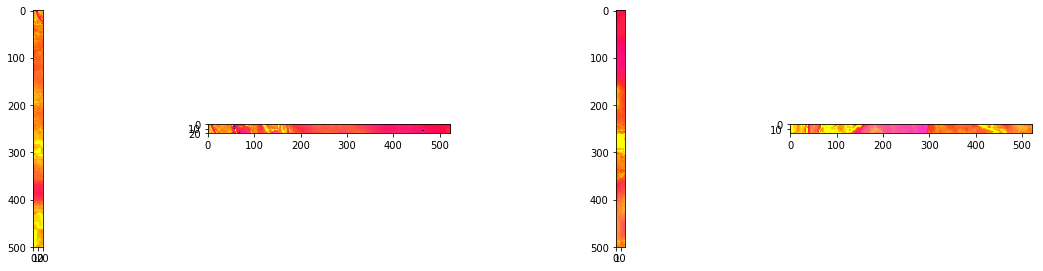

In [24]:
#BGR to HSI
normalized_img = np.zeros(img.shape).astype(float)
normalized_img = cv2.normalize(img.astype(float),normalized_img,0,1,cv2.NORM_MINMAX)
img_converted = np.zeros_like(img,dtype='float')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        H = 0
        S = 0
        I = 0
        R = float(normalized_img[i][j][2])
        G = float(normalized_img[i][j][1])
        B = float(normalized_img[i][j][0])
        RGB_sum = R + G + B
        RGB_min = min(R, G, B)
        #print("{} ,{} ,{} , {} , {}".format(R,G,B,RGB_min,RGB_sum))
        I = (1/3) * RGB_sum
        if R == G and G == B:
            H = 0
            S = 0
        else:
            S = 1 - ((3*RGB_min)/RGB_sum)
            if S > 0.9999:
                S = 1
            if S < 0.00001:
                S = 0
                H = 0
            else:
                dividend = (1/2) * ((R-G) + (R-B))
                divisor = math.sqrt(math.pow((R-G),2) + (R-B)*(G-B))
                w = dividend/divisor
                if w > 1:
                    w=1
                elif w < -1:
                    w = -1                    
                H = math.acos(w)
                if B > G:
                    H = (2*math.pi) - H
        img_converted[i][j][0] = H * (180 / math.pi)
        img_converted[i][j][1] = S
        img_converted[i][j][2] = I

plt.imshow(img_converted)
print("RGB {},{},{}  , HSI {},{},{}".format(img[0][0][2],img[0][0][1],img[0][0][0],img_converted[0][0][0]
                                           ,img_converted[0][0][1],img_converted[0][0][2]))
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(4,4,1)
plt.imshow(img_converted[0:,0:20])
ax = fig.add_subplot(4,4,2)
plt.imshow(img_converted[0:20,0:])
ax = fig.add_subplot(4,4,3)
plt.imshow(img_converted[0:,-20:-1])
ax = fig.add_subplot(4,4,4)
plt.imshow(img_converted[-20:-1,0:])

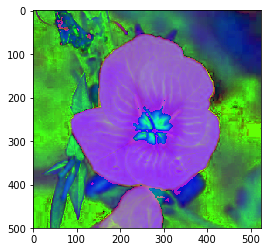

In [25]:
HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(HSV_img)

(array([  488.,   343.,   550.,   546.,  1711.,  1844.,  1618.,  1539.,
         2171.,  1672.,  1839.,  2652.,  2060.,  3063.,  2993.,  2781.,
         3229.,  2786.,  2464.,  2955.,  2904.,  3818.,  3158.,  3015.,
         2921.,  2856.,  4236.,  2618.,  2727.,  2709.,  3069.,  2469.,
         2834.,  2835.,  3353.,  4111.,  4257.,  3938.,  4424.,  4541.,
         4712.,  4363.,  4750.,  4683.,  5121.,  5614.,  6806.,  5846.,
         6386.,  5807.,  6325.,  6091.,  4677.,  4839.,  3945.,  5223.,
         4815.,  4376.,  4361.,  5219.,  5171.,  5882.,  5817.,  6953.,
         9315.,  8450.,  9856.,  9071.,  8138., 12529.,  5650.,  7360.,
         5799.,  5856.,  6589.,  4448.,  3692.,  4370.,  3377.,  4225.,
         5706.,  3252.,  3164.,  4163.,  3748.,  3444.,  2922.,  3578.,
         3154.,  3174.,  3637.,  3112.,  3412.,  3430.,  3489.,  3589.,
         4229.,  3467.,  4394.,  3469.,  3696.,  3668.,  2929.,  3389.,
         3083.,  2725.,  2703.,  2523.,  2535.,  2632.,  2430., 

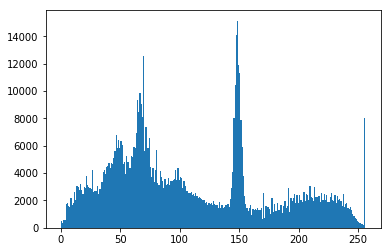

In [26]:
plt.hist(HSV_img.ravel(),256,[0,256])

In [31]:
def Remove_Freq_Values(original_image,mask,ratio):
    new_image = np.zeros_like(original_image)
    #cv2.calcHist(images, channels, mask, bins, ranges)
    hist = cv2.calcHist([original_image],[0],mask,[256],[0,256])
    original_hist = cv2.calcHist([original_image],[0],None,[256],[0,256])
    most_freq_ratio = hist[hist.argmax()] / hist.sum()
    print("most_freq_ratio : {}".format(most_freq_ratio))
    for i in range(original_image.shape[0]):
        for j in range(original_image.shape[1]):
            if hist[original_image[i][j][0]]/hist.sum() < (most_freq_ratio/ratio):# and original_hist[original_image[i][j][0]]/original_hist.sum() < 0.05:
                new_image[i][j][0] = original_image[i][j][0]
                new_image[i][j][1] = original_image[i][j][1]
                new_image[i][j][2] = original_image[i][j][2]
    if cv2.compare(new_image,original_image,0).all():
        print("Nothing Changed")
    return new_image

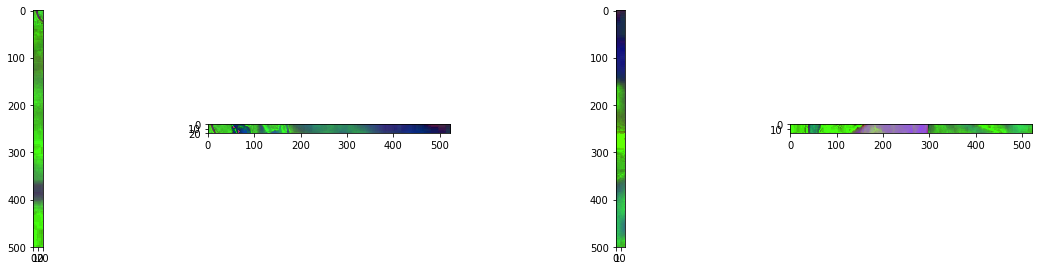

In [28]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(4,4,1)
plt.imshow(HSV_img[0:,0:20])
ax = fig.add_subplot(4,4,2)
plt.imshow(HSV_img[0:20,0:])
ax = fig.add_subplot(4,4,3)
plt.imshow(HSV_img[0:,-20:-1])
ax = fig.add_subplot(4,4,4)
plt.imshow(HSV_img[-20:-1,0:])

most_freq_ratio : [0.06091723]
most_freq_ratio : [0.6314363]
most_freq_ratio : [0.6182165]
Nothing Changed
most_freq_ratio : [0.60549265]
Nothing Changed


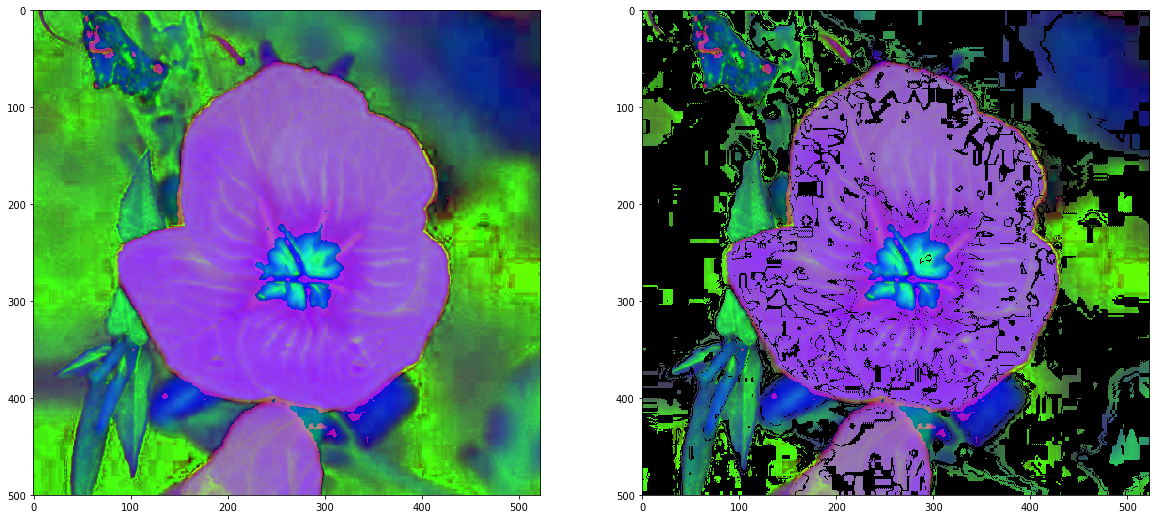

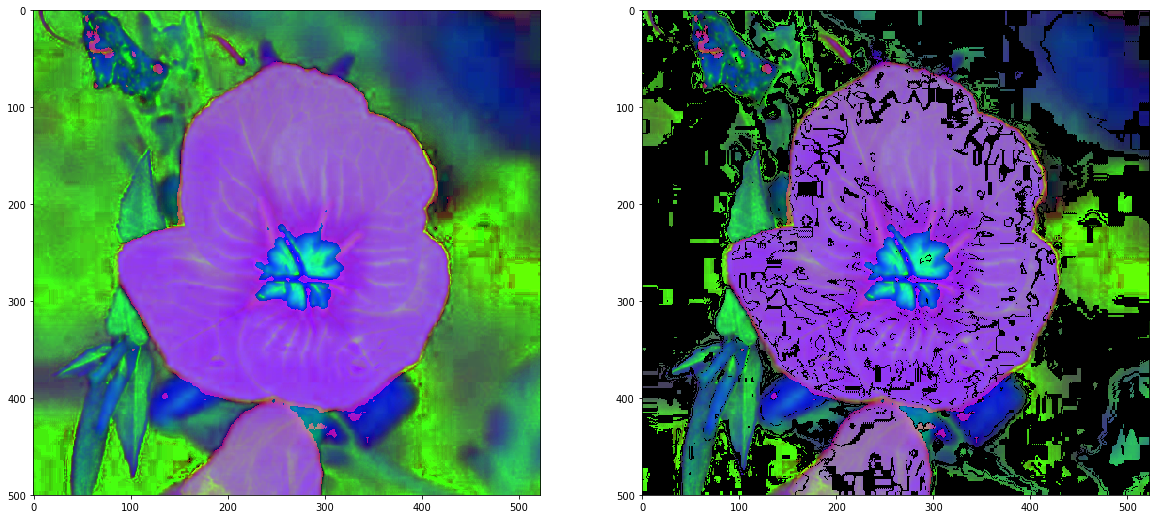

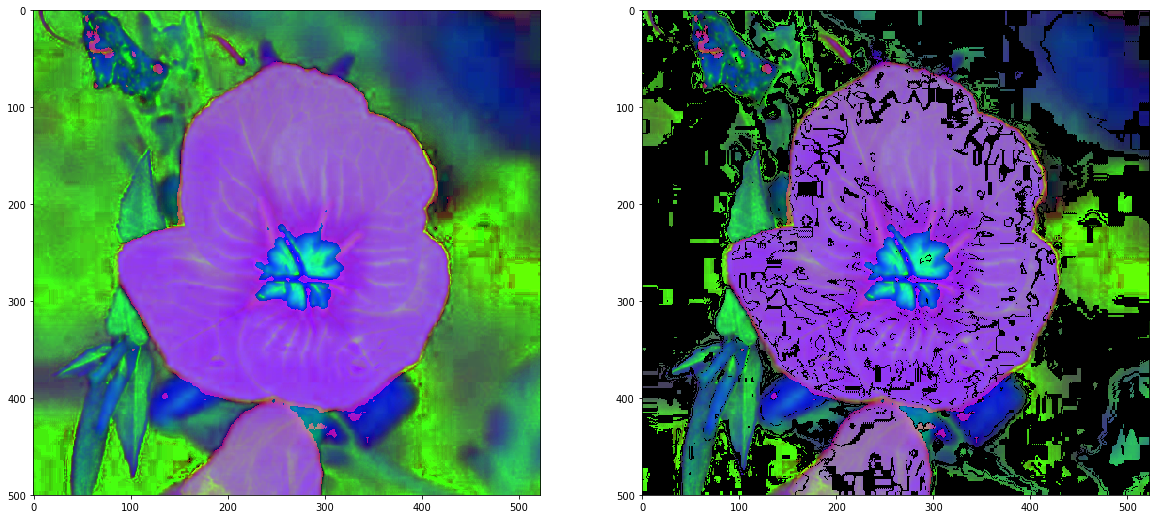

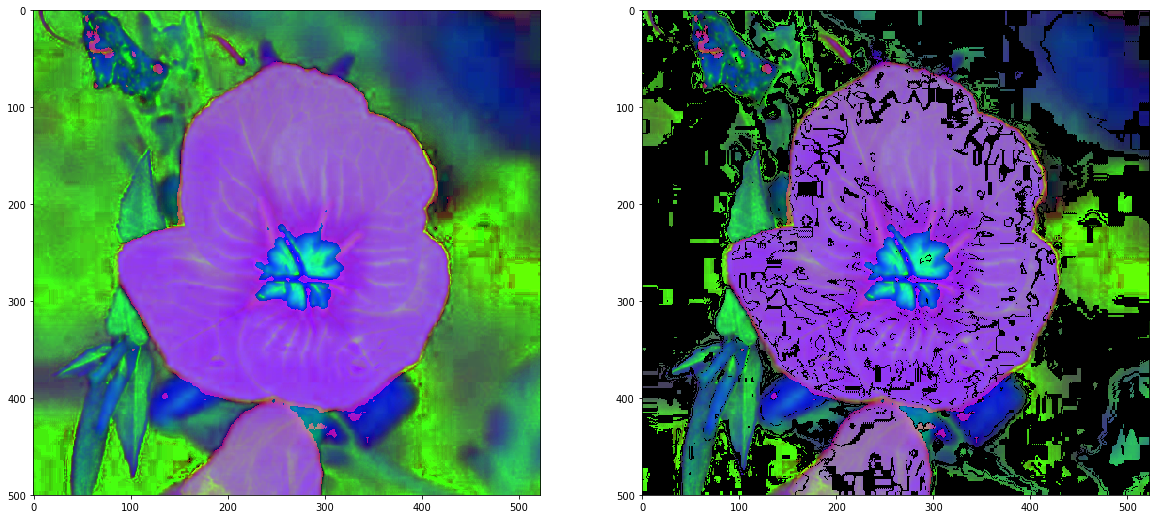

In [34]:
filterd_HSV_filter = np.zeros_like(HSV_img)
filterd_HSV_filter = cv2.normalize(HSV_img,filterd_HSV_filter,0,255,cv2.NORM_MINMAX)
filter_size = 10
for i in range(4):
    filter_size += 5
    mask = np.zeros(HSV_img.shape[:2],np.uint8)
    mask[0:,0:filter_size] = 1
    mask[0:,-filter_size:-1] = 1
    mask[0:filter_size,0:] = 1
    mask[-filter_size:-1,0:] = 1
    filterd_HSV_filter = Remove_Freq_Values(filterd_HSV_filter,mask,4)
    #plt.imshow(filterd_HSV_filter_1)
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(2,2,1)
    plt.imshow(HSV_img)
    ax = fig.add_subplot(2,2,2)
    plt.imshow(filterd_HSV_filter)

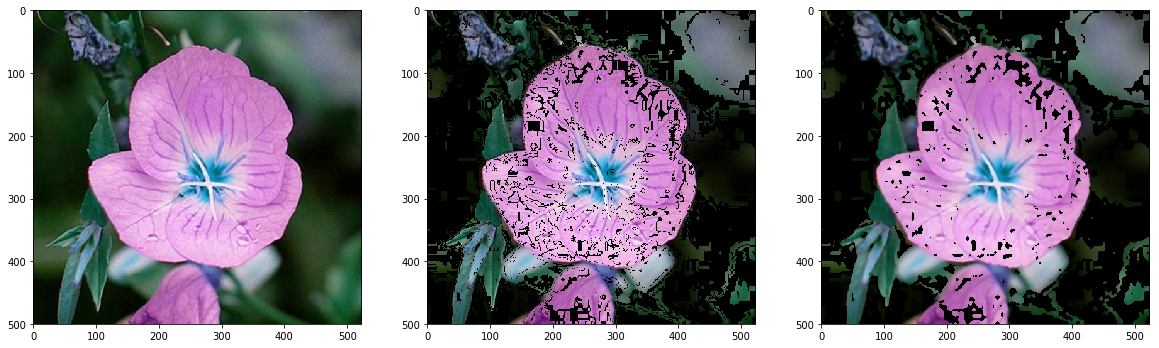

In [35]:
new_img = cv2.cvtColor(filterd_HSV_filter,cv2.COLOR_HSV2BGR)
new_img2 = cv2.medianBlur(new_img,5)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,3,1)
plt.imshow(img)
ax = fig.add_subplot(1,3,2)
plt.imshow(new_img)
ax = fig.add_subplot(1,3,3)
plt.imshow(new_img2)